## Setup Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import utils
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
sns.set_theme()
DATA_PATH="data/"
IMG_PATH='images/'

import warnings
warnings.filterwarnings('ignore')

## Import and Wrangle Data

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3]:
df = pd.read_csv('{}data_p90.csv'.format(DATA_PATH),encoding='cp1252')
metrics = ['Passes_Launch%', 'Passes_AvgLen','Goal Kicks_Launch%','Goal Kicks_AvgLen','Crosses_Stp%','Sweeper_#OPA', 'Sweeper_AvgDist','Passes_Att']
rev_metrics = ['Passes_Launch%','Passes_AvgLen','Goal Kicks_Launch%','Goal Kicks_AvgLen']

In [4]:
df = df.loc[df['90s']>df['90s'].quantile(0.1)]
df.shape

(101, 34)

In [5]:
df['Age'] = 2023-df['Born']

In [6]:
df[metrics].describe()

,Passes_Launch%,Passes_AvgLen,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Passes_Att
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,36.243564,34.203960,52.369307,42.666337,5.957426,1.153267,14.740594,27.966337
std,11.819707,4.734362,16.609478,8.394382,2.073179,0.537010,2.432249,5.307189
min,13.000000,23.600000,20.600000,25.300000,1.100000,0.210000,9.700000,17.700000
25%,29.700000,31.600000,38.200000,35.800000,4.600000,0.710000,12.800000,24.200000
50%,34.300000,33.300000,53.200000,42.900000,5.800000,1.090000,14.900000,27.700000
75%,41.600000,36.600000,64.700000,48.500000,7.400000,1.500000,16.600000,31.100000
max,71.200000,48.000000,91.200000,69.600000,13.400000,3.640000,22.500000,44.800000


In [7]:
df.shape

(101, 34)

In [8]:
for m in  ['Crosses_Stp%','Passes_Att']:
    print(m,": ",df[df[m] >= df[m].quantile(.99)].Player.unique().tolist())
    df = df[df[m] < df[m].quantile(.99)]
    

Crosses_Stp% :  ['Robin Zentner', 'Emiliano Martínez']
Passes_Att :  ['Manuel Riemann']


In [9]:
df[metrics].describe()

,Passes_Launch%,Passes_AvgLen,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Passes_Att
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,35.776531,34.041837,52.033673,42.491837,5.829592,1.113980,14.625510,27.791837
std,11.475018,4.636741,16.621424,8.377912,1.880623,0.470588,2.316472,5.081109
min,13.000000,23.600000,20.600000,25.300000,1.100000,0.210000,9.700000,17.700000
25%,29.025000,31.300000,37.600000,35.425000,4.525000,0.702500,12.800000,24.125000
50%,33.950000,33.300000,53.050000,42.850000,5.800000,1.080000,14.750000,27.500000
75%,41.350000,36.350000,63.875000,48.400000,7.275000,1.457500,16.600000,31.000000
max,71.200000,48.000000,91.200000,69.600000,9.900000,2.320000,19.300000,39.800000


In [10]:
df.shape

(98, 34)

In [11]:
df_ms = df[['Player']+metrics]
df_ms[metrics]= scaler.fit_transform(df_ms[metrics])

In [12]:
for x in rev_metrics:
    df_ms["Rev_"+x] = 1-df_ms[x]

In [13]:
df_ms = df_ms[['Player', 'Crosses_Stp%', 'Sweeper_#OPA', 'Sweeper_AvgDist',
       'Rev_Passes_Launch%', 'Rev_Passes_AvgLen', 'Rev_Goal Kicks_Launch%',
       'Rev_Goal Kicks_AvgLen','Passes_Att']]

In [14]:
df_ms.head()

,Player,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Rev_Passes_Launch%,Rev_Passes_AvgLen,Rev_Goal Kicks_Launch%,Rev_Goal Kicks_AvgLen,Passes_Att
1,Oliver Christensen,0.693182,1.000000,0.968750,0.508591,0.516393,0.297450,3.679458e-01,0.556561
2,Illan Meslier,0.761364,0.909953,0.739583,0.554983,0.594262,0.494334,5.914221e-01,0.239819
4,Kepa Arrizabalaga,0.397727,0.890995,0.854167,0.932990,0.893443,0.720963,8.103837e-01,0.592760
6,Vanja Milinkovi?-Savi?,0.636364,0.862559,0.781250,0.431271,0.315574,0.000000,1.110223e-16,0.918552
7,Nick Pope,0.761364,0.857820,0.854167,0.640893,0.606557,0.286119,4.040632e-01,0.076923


In [15]:
final_metrics = [x for x in df_ms.columns if x !='Player']

## Visualizations

### Alisson & Ederson

In [16]:
fig = utils.plot_radar(player_dict={
    'Alisson':utils.generate_stats(df_ms, 'Alisson', final_metrics),
    'Ederson':utils.generate_stats(df_ms, 'Ederson', final_metrics),
    # 'Aaron Ramsdale':utils.generate_stats(df_ms, 'Aaron Ramsdale', final_metrics),
    'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)
    }, 
                       categories=final_metrics, title='GK Playmaking Profile', value='Statistics')


### Top 5 Leagues

In [17]:
league_dict={}
for league in df.Comp.unique():
    gks = df.loc[df.Comp==league].Player.unique().tolist()
    df_temp = pd.DataFrame(df_ms.loc[df_ms.Player.isin(gks)][final_metrics].mean())
    df_temp.columns=['Statistics']
    league_dict.update({league:df_temp})
league_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

In [18]:
fig = utils.plot_radar(player_dict=league_dict, categories=final_metrics, title='Avg Profile by League', value='Statistics')

### Top 5 Leagues Top 2 Gks

In [19]:
t2_league_dict={}
t2_gks = []
squads = ['Liverpool','Manchester City','Barcelona','Real Madrid','Bayern Munich','Dortmund','Napoli','Paris S-G','Marseille','Arsenal']
for league in df.Comp.unique():
    gks = df.loc[(df.Comp==league)&(df.Squad.isin(squads))].Player.unique().tolist()
    t2_gks+=gks
    df_temp = pd.DataFrame(df_ms.loc[df_ms.Player.isin(gks)][final_metrics].mean())
    df_temp.columns=['Statistics']
    t2_league_dict.update({league:df_temp})
t2_league_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

In [23]:
fig = utils.plot_radar(player_dict=t2_league_dict, categories=final_metrics, title='Avg Profile by League (Top 2)', value='Statistics')

In [24]:
# player_ls = df.loc[df.Squad.isin(['Arsenal','Liverpool','Manchester City','Barcelona','Real Madrid','Bayern Munich','Dortmund','Napoli','Lazio','Paris S-G','Marseille'])].Player.unique().tolist()
# player_dict = {player: utils.generate_stats(df_ms, player, final_metrics) for player in player_ls}

## PCA

In [25]:
X = df_ms[final_metrics]

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

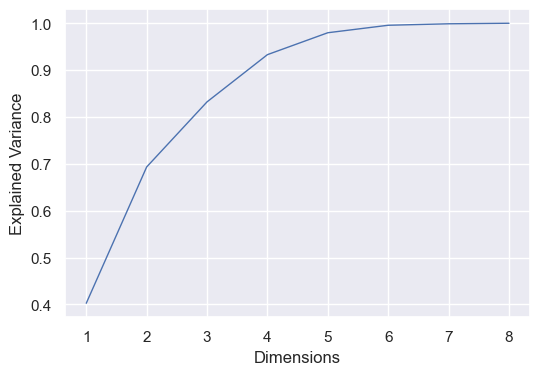

In [27]:
plt.figure(figsize=(6,4))
plt.plot([x+1 for x in range(X.shape[1])], cumsum, linewidth=1)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [28]:
t2 = np.where(df_ms.Player.isin(t2_gks),1,0)


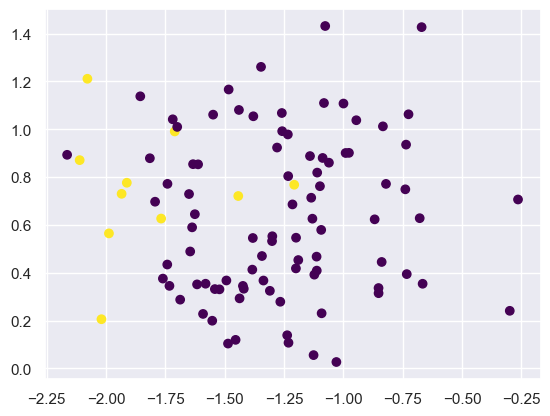

In [29]:
plt.scatter(X.dot(pca.components_[0]), X.dot(pca.components_[1]), alpha=1, label='samples', c = t2, cmap='viridis')

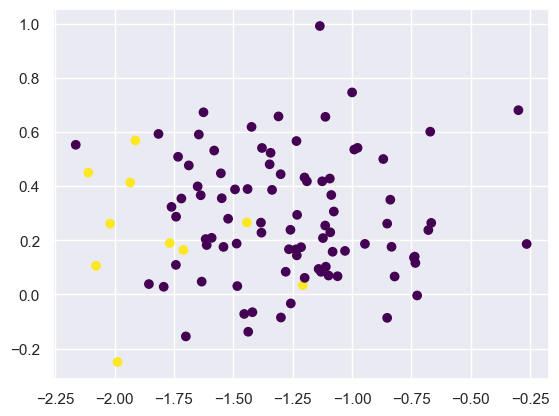

In [30]:
plt.scatter(X.dot(pca.components_[0]), X.dot(pca.components_[2]), alpha=1, label='samples', c = t2, cmap='viridis')

In [31]:
from mpl_toolkits import mplot3d

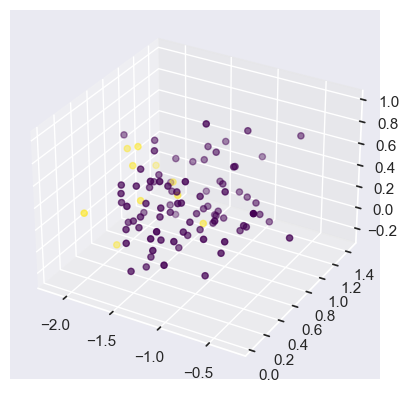

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X.dot(pca.components_[0]), X.dot(pca.components_[1]), X.dot(pca.components_[2]), c=t2, cmap='viridis')

## K Means

Text(0, 0.5, 'Inertia')

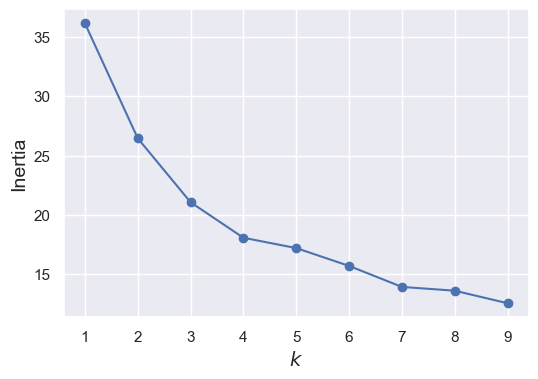

In [33]:
from sklearn.cluster import KMeans  

kmodels = [KMeans(n_clusters=k, random_state=42,n_init='auto').fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmodels]

plt.figure(figsize=(6,4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

In [34]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score


ss = [silhouette_score(X, model.labels_) for model in kmodels[1:]]

Text(0, 0.5, 'Silhouette score')

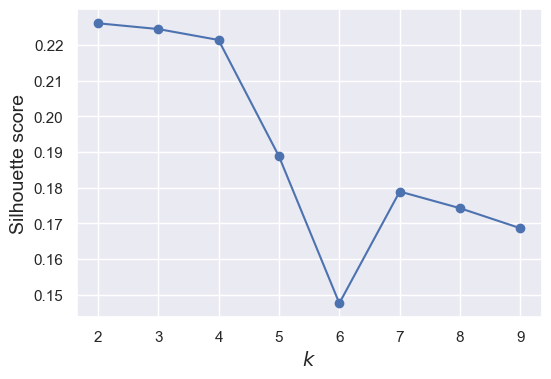

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), ss, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

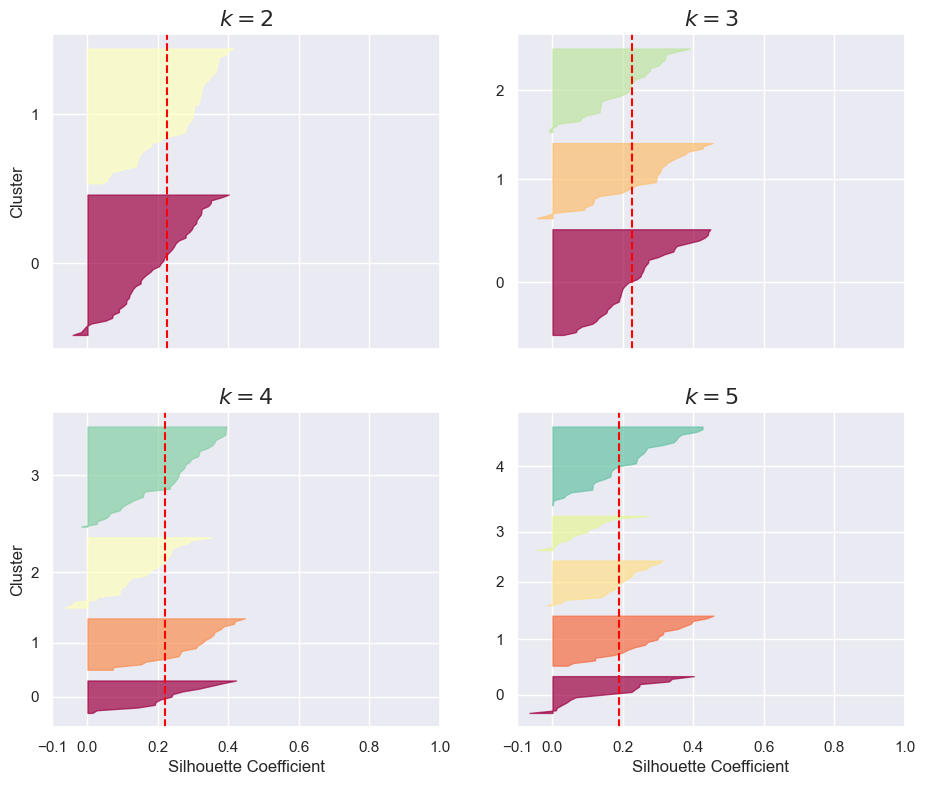

In [37]:
utils.silhouette_coefficients(X, kmodels, (2, 3, 4, 5), ss, figsize=(11, 9))

## Creating Clusters

In [41]:
model = KMeans(n_clusters=4, random_state=42,n_init='auto').fit(X)

In [42]:
df_ms['Cluster'] = model.predict(X)

<AxesSubplot: xlabel='PCA1', ylabel='PCA2'>

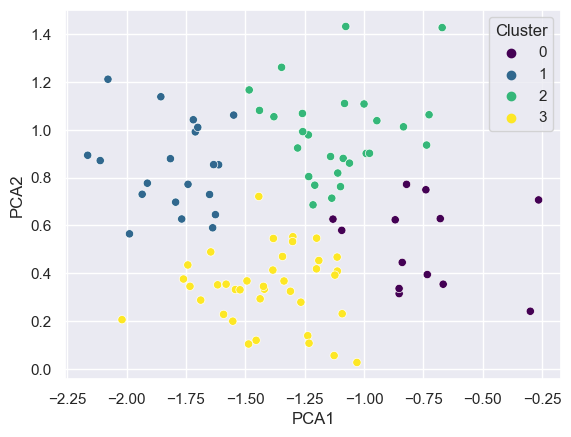

In [44]:
X =df_ms[final_metrics]
pca = PCA()
pca.fit(X)
X_pca = X.copy()
X_pca['PCA1'] = X.dot(pca.components_[0])
X_pca['PCA2'] = X.dot(pca.components_[1])
X_pca['Cluster'] = model.predict(X)

sns.scatterplot(data=X_pca, x="PCA1", y="PCA2", hue=X_pca['Cluster'], alpha=1, palette='viridis')


In [45]:
agg = df_ms.groupby(['Cluster']).mean().reset_index()
agg

,Cluster,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Rev_Passes_Launch%,Rev_Passes_AvgLen,Rev_Goal Kicks_Launch%,Rev_Goal Kicks_AvgLen,Passes_Att
0,0,0.416958,0.327743,0.385417,0.317076,0.292560,0.272390,0.401980,0.343891
1,1,0.573295,0.554739,0.700000,0.821220,0.766598,0.814235,0.806321,0.638009
2,2,0.581650,0.646832,0.719907,0.512282,0.483607,0.391250,0.464175,0.502598
3,3,0.528409,0.241207,0.311404,0.664994,0.628128,0.630983,0.686408,0.367111


In [46]:
cluster_dict={}
for c in agg.Cluster.unique():
    df_temp = agg.loc[agg.Cluster==c][final_metrics].transpose()
    df_temp.columns=['Statistics']
    cluster_dict.update({str(c):df_temp})
# league_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

In [47]:
fig = utils.plot_radar(player_dict=cluster_dict, categories=final_metrics, title='Avg Profile by Cluster', value='Statistics')

## Identify Targets

### Optimal Cluster

In [48]:
df_ms.loc[df_ms.Cluster==1].Player.unique().tolist()

['Kepa Arrizabalaga',
 'Alisson',
 'Mike Maignan',
 'Yassine Bounou',
 'Danny Ward',
 'Gregor Kobel',
 'Ivan Provedel',
 'Gerónimo Rulli',
 'Florian Müller',
 'Thibaut Courtois',
 'Yann Sommer',
 'Janis Blaswich',
 'Bernd Leno',
 'Brice Samba',
 'Oliver Baumann',
 'Ederson',
 'Alex Meret',
 'Andrea Consigli',
 'Marc-André ter Stegen',
 'Pepe Reina']

In [49]:
best_cluster_targets = [
 'Mike Maignan',
 'Yassine Bounou',
 'Danny Ward',
 'Gregor Kobel',
 'Ivan Provedel',
 'Gerónimo Rulli',
 'Florian Müller',
 'Janis Blaswich',
 'Bernd Leno',
 'Brice Samba',
 'Oliver Baumann',
 'Alex Meret',
 'Andrea Consigli',
 'Pepe Reina'
 ]

In [51]:
df.loc[df.Player.isin(best_cluster_targets)][['Player','Squad','Age','Expected_/90']+metrics].sort_values(['Expected_/90'], ascending=False)

,Player,Squad,Age,Expected_/90,Passes_Launch%,Passes_AvgLen,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Passes_Att
44,Bernd Leno,Fulham,31,0.25,27.9,30.6,39.5,36.6,7.0,1.25,15.0,31.0
73,Pepe Reina,Villarreal,41,0.24,20.9,28.2,36.1,34.8,3.3,0.86,16.9,32.1
28,Gerónimo Rulli,Villarreal,31,0.18,19.3,28.8,34.8,37.9,9.3,1.50,15.5,32.2
27,Ivan Provedel,Lazio,29,0.12,28.8,33.0,35.4,34.7,4.1,1.51,16.6,29.9
46,Brice Samba,Lens,29,0.12,34.3,32.7,26.2,29.3,7.3,1.23,16.7,29.2
22,Gregor Kobel,Dortmund,26,0.09,21.7,29.4,42.5,37.8,4.9,1.57,17.3,32.7
59,Alex Meret,Napoli,26,0.04,14.9,26.2,20.6,27.1,3.4,1.07,17.0,22.0
19,Yassine Bounou,Sevilla,32,-0.03,27.7,30.7,51.0,41.9,6.6,1.62,17.2,33.4
16,Mike Maignan,Milan,28,-0.05,27.1,31.7,34.7,36.3,7.7,1.64,17.7,31.6
38,Janis Blaswich,RB Leipzig,32,-0.09,15.0,25.3,23.1,27.7,8.0,1.33,16.2,38.4


In [53]:
df.loc[df.Player=='David de Gea'][['Player','Squad','Age','Expected_/90']+metrics]

,Player,Squad,Age,Expected_/90,Passes_Launch%,Passes_AvgLen,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Passes_Att
75,David de Gea,Manchester Utd,33,-0.08,31.6,31.6,65.5,48.3,3.0,0.83,14.5,27.1


In [86]:
first_targets = df.loc[(df.Player.isin(best_cluster_targets))&(df['Expected_/90']>0)&(df.Age<30)].Player.unique().tolist()

In [94]:
print(df.loc[df.Player.isin(first_targets+['David de Gea'])][['Player','Squad','Age','Expected_/90']+metrics].sort_values(['Expected_/90'], ascending=False).to_markdown())

|    | Player        | Squad          |   Age |   Expected_/90 |   Passes_Launch% |   Passes_AvgLen |   Goal Kicks_Launch% |   Goal Kicks_AvgLen |   Crosses_Stp% |   Sweeper_#OPA |   Sweeper_AvgDist |   Passes_Att |
|---:|:--------------|:---------------|------:|---------------:|-----------------:|----------------:|---------------------:|--------------------:|---------------:|---------------:|------------------:|-------------:|
| 27 | Ivan Provedel | Lazio          |    29 |           0.12 |             28.8 |            33   |                 35.4 |                34.7 |            4.1 |           1.51 |              16.6 |         29.9 |
| 46 | Brice Samba   | Lens           |    29 |           0.12 |             34.3 |            32.7 |                 26.2 |                29.3 |            7.3 |           1.23 |              16.7 |         29.2 |
| 22 | Gregor Kobel  | Dortmund       |    26 |           0.09 |             21.7 |            29.4 |                 42.5 |            

In [88]:
targets_dict = {player: utils.generate_stats(df_ms, player, final_metrics) for player in first_targets}
targets_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

In [89]:
fig = utils.plot_radar(player_dict=targets_dict, categories=final_metrics, title='Targets Playmaking Profile', value='Statistics')

### 2nd Optimal Cluster

In [68]:
df_ms.loc[df_ms.Cluster==3].Player.unique().tolist()

['Hugo Lloris',
 'Pau López',
 'Yehvann Diouf',
 'Vicente Guaita',
 'Jonas Omlin',
 'Wojciech Szcz?sny',
 'Alban Lafont',
 'Alexander Nübel',
 'Matz Sels',
 'José Sá',
 'David de Gea',
 'Ciprian T?t?ru?anu',
 'Kevin Trapp',
 'Gianluigi Donnarumma',
 'Rui Patrício',
 'Luigi Sepe',
 'Michele Di Gregorio',
 'Jan Oblak',
 'Marco Bizot',
 'Fernando',
 'Kasper Schmeichel',
 '?ukasz Skorupski',
 'Lucas Chevalier',
 'Paul Bernardoni',
 'Mory Diaw',
 'Maxime Dupé',
 'Guglielmo Vicario',
 'Lukáš Hrádecký',
 'Anthony Lopes',
 'Robert Sánchez',
 'Marvin Schwäbe',
 'Yvon Mvogo',
 'Marco Silvestri',
 'Vito Mannone',
 'André Onana',
 'Jordi Masip',
 'Gauthier Gallon',
 'Édgar Badía']

In [78]:
# based on eye balling best passers within that cluster
second_best_cluster_targets = [
 'Yehvann Diouf',
 'Michele Di Gregorio',
 'Lukáš Hrádecký',
 'Anthony Lopes',
 'Marvin Schwäbe',
 'André Onana'
 ]

In [79]:
second_targets_dict = {player: utils.generate_stats(df_ms, player, final_metrics) for player in second_best_cluster_targets}
second_targets_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

fig = utils.plot_radar(player_dict=second_targets_dict, categories=final_metrics, title='Targets Playmaking Profile', value='Statistics')

In [82]:
df.loc[df.Player.isin(second_best_cluster_targets)][['Player','Squad','Age','Expected_/90']+metrics].sort_values(['Expected_/90'], ascending=False)


,Player,Squad,Age,Expected_/90,Passes_Launch%,Passes_AvgLen,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist,Passes_Att
55,Yehvann Diouf,Reims,24,0.29,29.7,32.3,32.9,33.8,9.3,1.13,12.7,27.3
101,Anthony Lopes,Lyon,33,0.08,32.2,32.4,31.1,32.4,5.5,0.58,12.7,24.6
84,Michele Di Gregorio,Monza,26,0.05,30.5,32.4,35.3,33.4,3.1,0.72,12.4,32.8
99,Lukáš Hrádecký,Leverkusen,34,-0.08,32.4,32.5,42.9,37.2,6.5,0.59,13.2,28.2
109,André Onana,Inter,27,-0.14,26.7,30.2,32.3,35.8,6.0,0.45,12.5,35.0
104,Marvin Schwäbe,Köln,28,-0.29,27.7,31.1,28.9,33.0,3.9,0.54,12.9,36.1


In [83]:
final_second_best_cluster_targets = [
 'Yehvann Diouf',
 'Michele Di Gregorio',
 'Anthony Lopes',
 ]

In [84]:
second_targets_dict = {player: utils.generate_stats(df_ms, player, final_metrics) for player in final_second_best_cluster_targets}
second_targets_dict.update({'David de Gea':utils.generate_stats(df_ms, 'David de Gea', final_metrics)})

fig = utils.plot_radar(player_dict=second_targets_dict, categories=final_metrics, title='Targets Playmaking Profile', value='Statistics')

In [95]:
print(df.loc[df.Player.isin(final_second_best_cluster_targets+['David de Gea'])][['Player','Squad','Age','Expected_/90']+metrics].sort_values(['Expected_/90'], ascending=False).to_markdown())

|     | Player              | Squad          |   Age |   Expected_/90 |   Passes_Launch% |   Passes_AvgLen |   Goal Kicks_Launch% |   Goal Kicks_AvgLen |   Crosses_Stp% |   Sweeper_#OPA |   Sweeper_AvgDist |   Passes_Att |
|----:|:--------------------|:---------------|------:|---------------:|-----------------:|----------------:|---------------------:|--------------------:|---------------:|---------------:|------------------:|-------------:|
|  55 | Yehvann Diouf       | Reims          |    24 |           0.29 |             29.7 |            32.3 |                 32.9 |                33.8 |            9.3 |           1.13 |              12.7 |         27.3 |
| 101 | Anthony Lopes       | Lyon           |    33 |           0.08 |             32.2 |            32.4 |                 31.1 |                32.4 |            5.5 |           0.58 |              12.7 |         24.6 |
|  84 | Michele Di Gregorio | Monza          |    26 |           0.05 |             30.5 |            32.4 |